<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


C:\Users\Sakshi Kapase\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


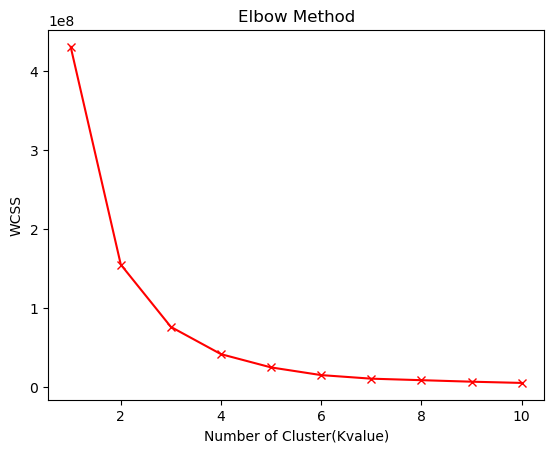

NameError: name 'StandardScaler' is not defined

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('sales_data_sample.csv',encoding='latin-1')
df
df.head()
df.tail()
df.describe()
df.info()
df.isnull().sum()
df.columns

df.dropna(subset=['ADDRESSLINE2'],inplace=True)
df.dropna(subset=['STATE'],inplace=True)
df.dropna(subset=['TERRITORY'],inplace=True)
df.dropna(subset=['POSTALCODE'],inplace=True)

df.isnull().sum()

X=df.iloc[ :, [3,4]].values

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []
from sklearn.cluster import KMeans
# Determine the WCSS for a range of cluster numbers (e.g., 1 to 10)
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
# It's a measure of the variance within each cluster and is calculated as
#the sum of squared distances between data points and their assigned cluster centers.
# Plot the WCSS values to identify the elbow point
plt.plot(range(1,11), wcss,'rx-')
plt.title("Elbow Method")
plt.xlabel("Number of Cluster(Kvalue)")
plt.ylabel("WCSS")
plt.show()


scale = StandardScaler()
scaled_data = scale.fit_transform(X)
     
# Based on the plot, visually determine the optimal number of clusters, where the WCSS starts to level off (the "elbow" point)

# Implement K-Means clustering with the optimal number of clusters
# Let's assume you found the optimal number of clusters to be 'k'
k = 3  # Replace with the number you determined from the elbow method
     
     

kmeans = KMeans(n_clusters=3,random_state = 0)
cluster_lables = kmeans.fit_predict(scaled_data)


wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, random_state=2)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)
     
    
    
# Plot the WCSS values to identify the elbow point
plt.plot(range(1,11), wcss,'bx-')
plt.title("Elbow Method")
plt.xlabel("Number of Cluster(Kvalue)")
plt.ylabel("WCSS")
plt.show()